In [1]:
!pip install xgboost -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    roc_auc_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from ipywidgets import interact, fixed



In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [5]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


# Missing values analysis

In [6]:
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [7]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [8]:
df['fail'].value_counts()

fail
0    551
1    393
Name: count, dtype: int64

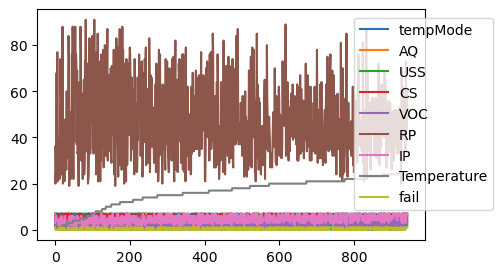

In [9]:


plt.figure(figsize=(5,3))
for each in df.drop('footfall', axis=1):
    plt.plot(df[each], label=each)
plt.legend(loc="best",bbox_to_anchor=(0.8,0.1))

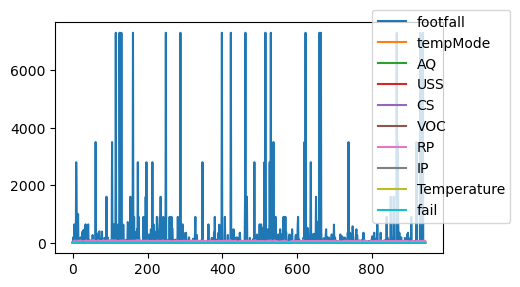

In [10]:
plt.figure(figsize=(5,3))
for each in df:
     plt.plot(df[each], label=each)
plt.legend(loc="best",bbox_to_anchor=(0.8,0.1))

# Data distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

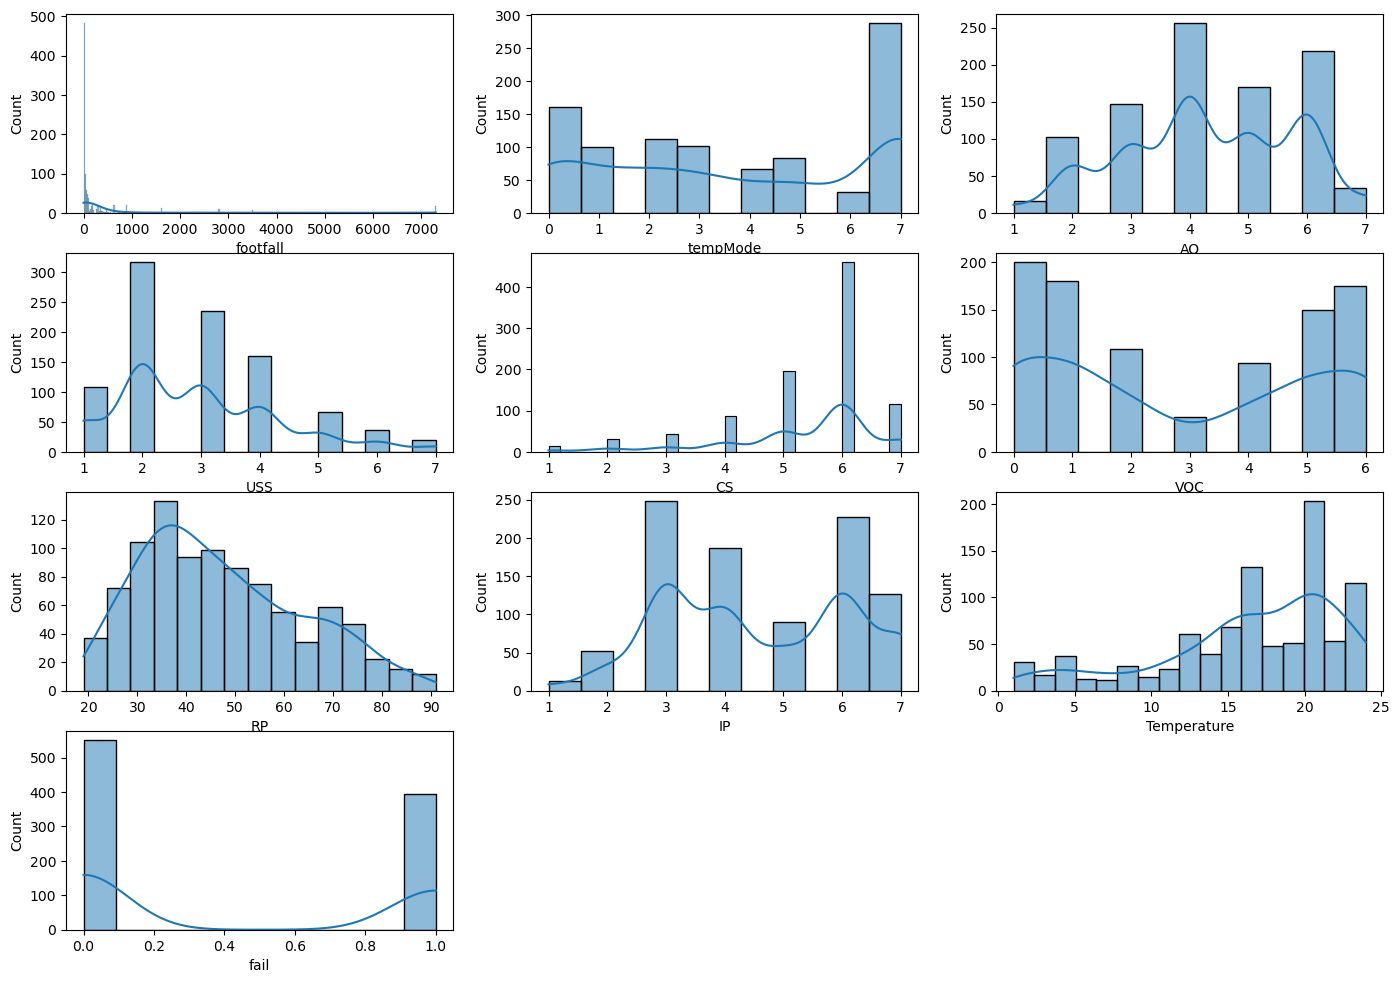

In [11]:

columns=df.columns

plt.figure(figsize=(17,15))
for i, col in enumerate(columns,1):
    plt.subplot(5,3, i)
    sns.histplot(df[col], kde=True)
    #plt.title(f'{col} distribution')
# plt.tight_layout()
plt.show()

             footfall  tempMode        AQ       USS        CS       VOC  \
footfall     1.000000  0.020457 -0.065816  0.019453  0.025638 -0.089590   
tempMode     0.020457  1.000000 -0.010855  0.002142 -0.013956 -0.052369   
AQ          -0.065816 -0.010855  1.000000 -0.156884 -0.090010  0.618570   
USS          0.019453  0.002142 -0.156884  1.000000 -0.352915 -0.399477   
CS           0.025638 -0.013956 -0.090010 -0.352915  1.000000  0.048037   
VOC         -0.089590 -0.052369  0.618570 -0.399477  0.048037  1.000000   
RP          -0.043720  0.408784  0.094656 -0.032549 -0.026968  0.008023   
IP          -0.003869 -0.058109 -0.105868 -0.206416  0.185739  0.103628   
Temperature -0.018009 -0.062568  0.034328 -0.225122  0.143972  0.208956   
fail        -0.073066 -0.014462  0.583238 -0.466574  0.018855  0.797329   

                   RP        IP  Temperature      fail  
footfall    -0.043720 -0.003869    -0.018009 -0.073066  
tempMode     0.408784 -0.058109    -0.062568 -0.014462  
AQ 

Text(0.5, 1.0, 'Correlation matrix')

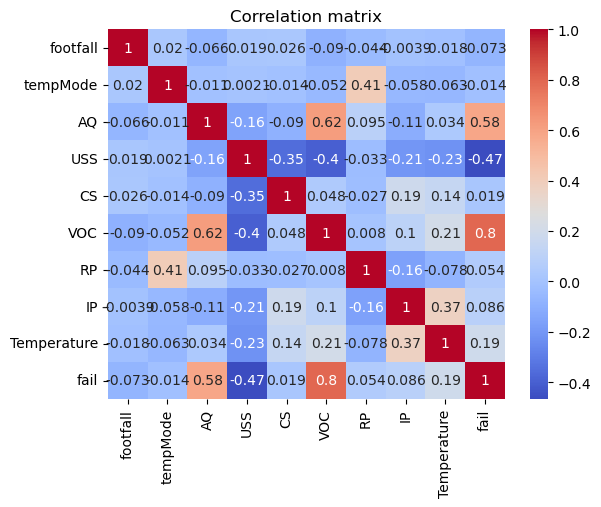

In [12]:
correlation=df.corr()
print(correlation)
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')

In [13]:
x=df.drop('fail',axis=1)
y=df['fail']

In [14]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)#x

In [15]:
y_train.value_counts(), y_test.value_counts()

(fail
 0    441
 1    314
 Name: count, dtype: int64,
 fail
 0    110
 1     79
 Name: count, dtype: int64)

In [16]:
mms= MinMaxScaler()

x_train_scaled=pd.DataFrame(mms.fit_transform(x_train),columns=x_train.columns)
x_test_scaled=pd.DataFrame(mms.transform(x_test),columns=x_test.columns)


# Visualization of scaled data


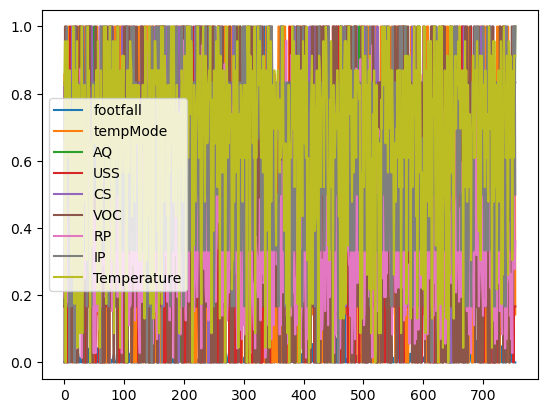

In [17]:
for each in x_train_scaled:
    plt.plot(x_train_scaled[each], label=each)
plt.legend()
plt.show()

Number of components: 8


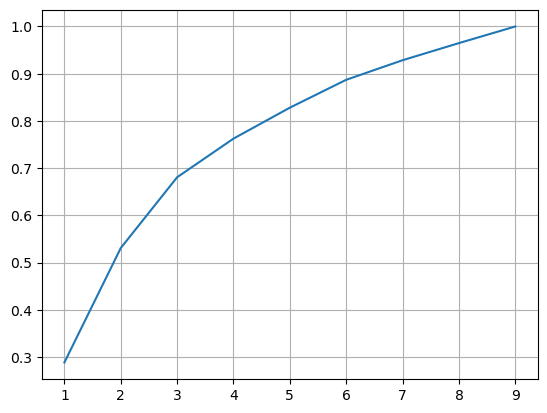

In [18]:

pca= decomposition.PCA(n_components=x_train_scaled.columns.size)

pca.fit(x_train_scaled)

plt.plot(range(1,x_train_scaled.columns.size+1), np.cumsum(pca.explained_variance_ratio_))
plt.grid()
################################
pca= decomposition.PCA(n_components=0.95) #preserving 95% of the information #variance = quantity of information that each component can explain
df_pca = pca.fit_transform(x_train_scaled)

num_components = pca.n_components_
print(f"Number of components: {num_components}")

<!-- # hacerlo con el x_scaled.........................
primero hacer el split y luego escalar,
Evitar fugas de información: Si escalas los datos antes de dividirlos, estarías utilizando información del conjunto de prueba para escalar el conjunto de entrenamiento. Esto significa que tu modelo estaría "aprendiendo" de datos que en realidad debería estar prediciendo, lo que llevaría a una sobreestimación del rendimiento en el conjunto de prueba.

Preservar la independencia de los conjuntos: Al dividir los datos primero, aseguras que el conjunto de prueba sea completamente independiente del conjunto de entrenamiento. Esto es fundamental para obtener una evaluación imparcial del rendimiento de tu modelo.

El PCA (Análisis de Componentes Principales) se realiza después de escalar los datos y dividirlos en conjuntos de entrenamiento y prueba, pero antes de entrenar el modelo.

Realizar el PCA después de la división garantiza que los componentes principales sean calculados únicamente sobre los datos de entrenamiento. Si lo hicieras antes, estarías utilizando información del conjunto de prueba para construir los componentes, lo que podría introducir sesgos en el modelo.
 -->

In [19]:
pca=decomposition.PCA(n_components=8)

x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)
#x_pca=pd.DataFrame(x_pca,columns=['pca1','pca2','pca3','pca4','pca5','pca6'])
x_train_pca, y

(array([[ 0.48604853,  0.05599854, -0.46468965, ..., -0.28091988,
         -0.13139069, -0.08680689],
        [-0.73707537, -0.03911392, -0.11037746, ...,  0.12467169,
         -0.03964717, -0.0353786 ],
        [ 0.67228949,  0.42388588,  0.55048253, ...,  0.43564987,
          0.17013245,  0.00951569],
        ...,
        [-0.50239472,  0.25504131, -0.18664332, ...,  0.23956027,
          0.06993415, -0.04647211],
        [-0.41720303,  0.35614706, -0.41010131, ..., -0.05948752,
          0.05202576, -0.04788465],
        [-0.7943958 , -0.14277615,  0.14378027, ..., -0.01871031,
          0.12538298, -0.0873974 ]]),
 0      1
 1      0
 2      0
 3      0
 4      0
       ..
 939    1
 940    1
 941    1
 942    1
 943    1
 Name: fail, Length: 944, dtype: int64)

In [20]:
pd.DataFrame(x_train_pca)

,0,1,2,3,4,5,6,7
0,0.486049,0.055999,-0.464690,-0.102039,0.030535,-0.280920,-0.131391,-0.086807
1,-0.737075,-0.039114,-0.110377,0.156834,-0.079276,0.124672,-0.039647,-0.035379
2,0.672289,0.423886,0.550483,0.179611,0.235864,0.435650,0.170132,0.009516
3,-0.640874,-0.168995,-0.261251,0.016399,0.105728,-0.100890,-0.051414,0.140133
4,-0.477463,0.306485,-0.396165,-0.021867,0.092109,0.116462,-0.065223,-0.071458
...,...,...,...,...,...,...,...,...
750,0.387150,0.120999,0.252188,0.293813,-0.289934,0.025618,0.076918,-0.056751
751,-0.601956,0.410020,-0.169092,-0.094829,0.225905,0.291173,-0.012706,-0.076661
752,-0.502395,0.255041,-0.186643,0.027458,-0.152145,0.239560,0.069934,-0.046472
753,-0.417203,0.356147,-0.410101,0.128916,0.176766,-0.059488,0.052026,-0.047885


# Threshold for Accuracy

In [21]:
baseline_accuracy = y.value_counts().max()/len(y)
baseline_accuracy

0.5836864406779662

# Training - with outliers

In [22]:
# LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(x_train_pca,y_train)
y_pred_log=log_reg.predict(x_test_pca)
print('Accuracy', accuracy_score(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

Accuracy 0.9153439153439153
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       110
           1       0.87      0.94      0.90        79

    accuracy                           0.92       189
   macro avg       0.91      0.92      0.91       189
weighted avg       0.92      0.92      0.92       189



In [23]:
# RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_pca, y_train)

y_pred_rf=rf_model.predict(x_test_pca)
print('Accuracy', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 0.9206349206349206
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       110
           1       0.91      0.90      0.90        79

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.92      0.92      0.92       189



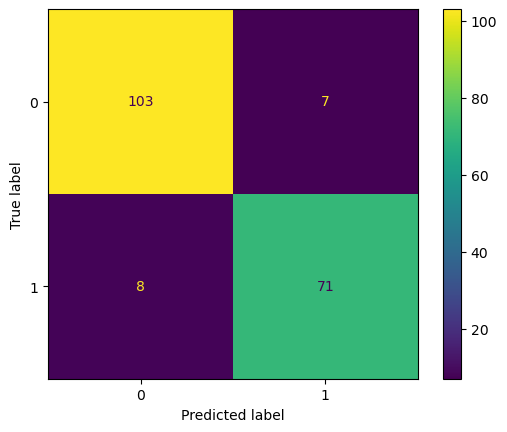

ROC-AUC Score: 0.9175489067894131


In [24]:

cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.show()

auc_score = roc_auc_score(y_test, y_pred_rf)
print("ROC-AUC Score:", auc_score)

In [25]:
import torch
X_train_np = x_train_pca
y_train_np = y_train.to_numpy().reshape(-1, 1)
X_test_np = x_test_pca
y_test_np = y_test.to_numpy().reshape(-1, 1)

X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np, dtype=torch.float32)

In [26]:
# multi layer perceptron
import torch.nn as nn
import torch.optim as optim


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#training
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()


In [27]:
model.eval()
with torch.no_grad(): 
    y_pred = model(X_test)
    y_pred_labels = (y_pred >= 0.5).int()


from sklearn.metrics import f1_score, precision_score, recall_score


f1 = f1_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


F1 Score: 0.9135802469135801
Precision: 0.891566265060241
Recall: 0.9367088607594937


In [28]:
#Correlation with output variable
cor_target = abs(df.corr()["fail"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

AQ      0.583238
USS     0.466574
VOC     0.797329
fail    1.000000
Name: fail, dtype: float64

# Test 2
# Outlier analysis

In [29]:

for each in df.columns:
    data = df[each]  # each column
    
    # Calculate IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers_index = data[(data < lower_bound) | (data > upper_bound)].index
    #to delete outliers
    # df_cleaned = df_cleaned[(df_cleaned[each] >= lower_bound) & (df_cleaned[each] <= upper_bound)]

    print(f"Column: {each}")
    print(f"Number of outliers: {len(outliers_index)}")
    
    outliers_fail = df.loc[outliers_index, 'fail']
    print("'fail' outliers distribution:")
    print(outliers_fail.value_counts())
    print("-" * 40)


Column: footfall
Number of outliers: 154
'fail' outliers distribution:
fail
0    107
1     47
Name: count, dtype: int64
----------------------------------------
Column: tempMode
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------------------------------------
Column: AQ
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------------------------------------
Column: USS
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------------------------------------
Column: CS
Number of outliers: 87
'fail' outliers distribution:
fail
0    71
1    16
Name: count, dtype: int64
----------------------------------------
Column: VOC
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------------------------------------
Column: RP
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------

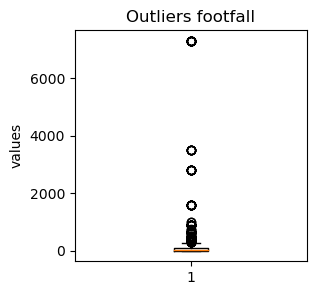

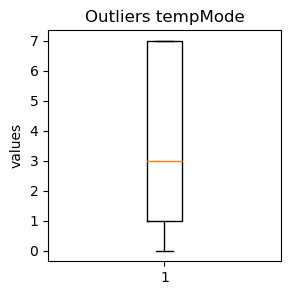

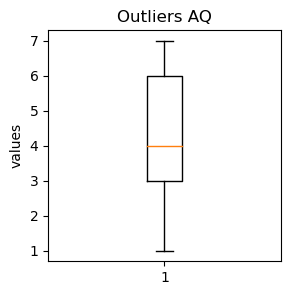

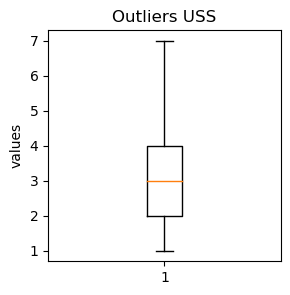

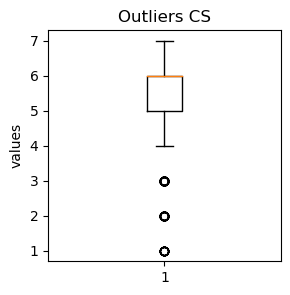

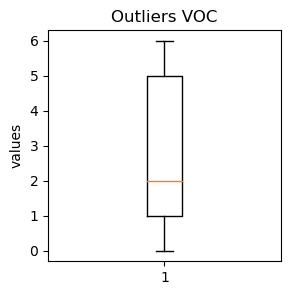

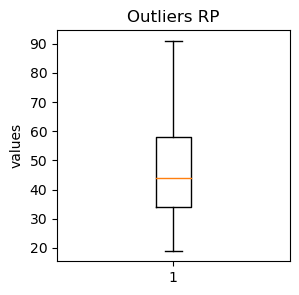

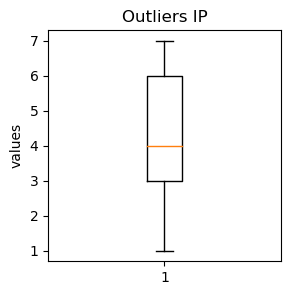

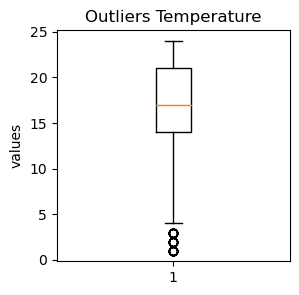

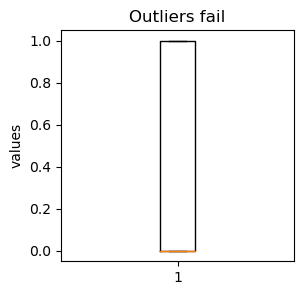

In [30]:

for each in df.columns:
    plt.figure(figsize=(3,3))
    plt.boxplot(df[each])   
    plt.title(f'Outliers {each}')
    plt.ylabel('values')
    plt.show()


In [31]:
df['fail'].value_counts()

fail
0    551
1    393
Name: count, dtype: int64

## Delete outliers

In [32]:

df_cleaned = df.copy()

columns_to_process = ['Temperature', 'CS']

for column in columns_to_process:
    data = df_cleaned[column]  
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

for column in columns_to_process:
    data = df_cleaned[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_index = data[(data < lower_bound) | (data > upper_bound)].index
    print(f"Column: {column}")
    print(f"Number of outliers remaining: {len(outliers_index)}")


Column: Temperature
Number of outliers remaining: 30
Column: CS
Number of outliers remaining: 0


In [33]:

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")


Original DataFrame shape: (944, 10)
Cleaned DataFrame shape: (817, 10)


In [34]:
df_cleaned.index=range(0,df_cleaned.shape[0])

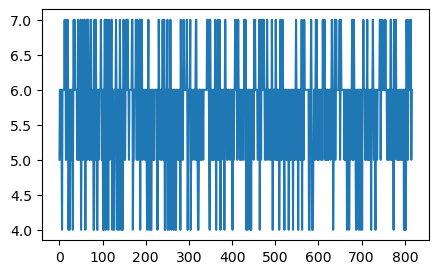

In [35]:
plt.figure(figsize=(5,3))
plt.plot(df_cleaned['CS'])


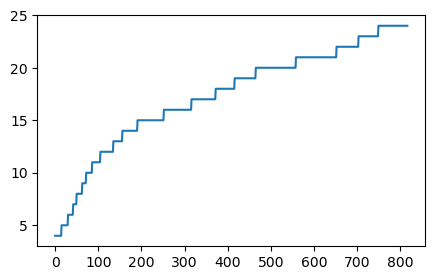

In [36]:
plt.figure(figsize=(5,3))
plt.plot(df_cleaned['Temperature'])

# Test without 'footfall' features and without outliers (Final test)

In [37]:
x=df_cleaned.drop('fail',axis=1).drop('footfall',axis=1)
y=df_cleaned['fail']


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [39]:

mms= MinMaxScaler((0,1))#StandardScaler()

x_train_scaled=pd.DataFrame(mms.fit_transform(x_train),columns=x_train.columns)
x_test_scaled=pd.DataFrame(mms.transform(x_test),columns=x_test.columns)

Number of components: 7


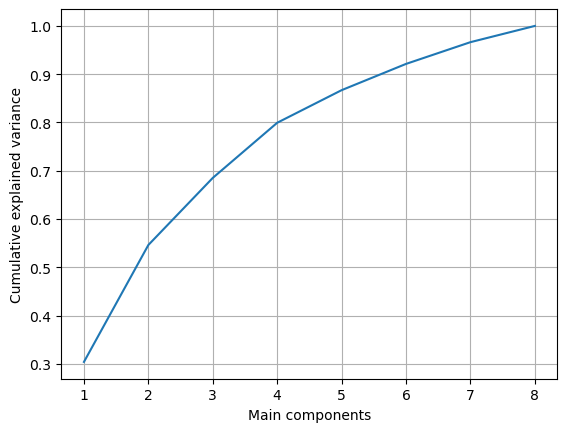

In [40]:

pca= decomposition.PCA(n_components=x_train_scaled.columns.size)

pca.fit(x_train_scaled)

plt.plot(range(1,x_train_scaled.columns.size+1), np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.ylabel('Cumulative explained variance')
plt.xlabel('Main components')

#
pca= decomposition.PCA(n_components=0.95) #preserving 95% of the information #variance = quantity of information that each component can explain
df_pca = pca.fit_transform(x_train_scaled)

num_components = pca.n_components_
print(f"Number of components: {num_components}")

In [41]:
pca=decomposition.PCA(n_components=7)

x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)
# x_pca=pd.DataFrame(x_pca,columns=['pca1','pca2','pca3','pca4','pca5','pca6'])
x_train_pca, y
x_train_pca_df=pd.DataFrame(x_train_pca)

In [42]:
x_train_pca_df

,0,1,2,3,4,5,6
0,0.537744,-0.084918,-0.019218,-0.183941,-0.210332,0.167033,0.125222
1,-0.620786,-0.157385,-0.342914,0.040064,0.300420,-0.216781,0.071071
2,0.378876,0.683107,-0.179125,0.206882,0.156954,0.239662,-0.052792
3,0.210581,-0.503155,-0.148649,0.331629,-0.111456,0.235379,-0.068365
4,0.560739,-0.114943,0.227513,-0.229518,0.322598,-0.254968,-0.010368
...,...,...,...,...,...,...,...
648,0.712347,-0.207288,0.071820,0.158030,-0.029976,-0.009235,0.035325
649,-0.377107,0.181186,0.090721,-0.119260,0.045821,0.232109,0.072811
650,0.176518,0.602539,-0.059832,0.158517,0.330937,0.091321,0.093723
651,-0.734181,0.480270,0.591564,0.065837,0.228587,0.112374,0.297771


## To see the result of the PCA analysis

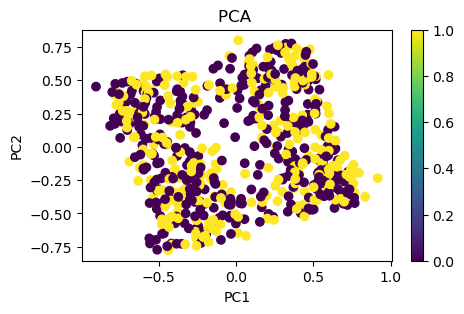

In [43]:
plt.figure(figsize=(5, 3))
#fig, ax = plt.subplots()
gr=plt.scatter(x_train_pca_df[0][:], x_train_pca_df[1][:], c=y[:653])
plt.colorbar(gr,orientation='vertical')
plt.title('PCA ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The yellow dots represent the data with the target failure = 1

## Cluster analysis

In [44]:

clusterer=KMeans(n_clusters=2)

In [45]:
clusterer.fit(x_train_pca_df)
y_cluster=clusterer.predict(x_train_pca_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
y_cluster=pd.DataFrame(y_cluster)
y_cluster.value_counts()

1    329
0    324
Name: count, dtype: int64

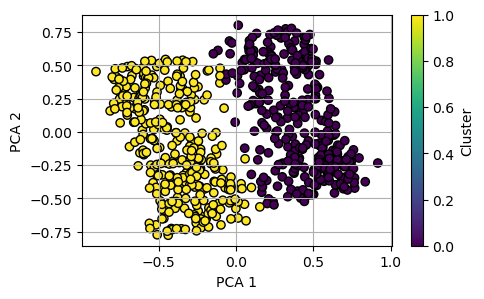

In [47]:
   
plt.figure(figsize=(5, 3))
plt.scatter(
    x_train_pca_df[0][:],
    x_train_pca_df[1][:],
    c=y_cluster[:],
    cmap='viridis',
    edgecolor='k'
)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

The cluster analusys show two different clusters

# Model training
## LogisticRegression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(x_train_pca,y_train)
y_pred_log=log_reg.predict(x_test_pca)
print('Accuracy', accuracy_score(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

Accuracy 0.9512195121951219
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.95      0.95      0.95        74

    accuracy                           0.95       164
   macro avg       0.95      0.95      0.95       164
weighted avg       0.95      0.95      0.95       164



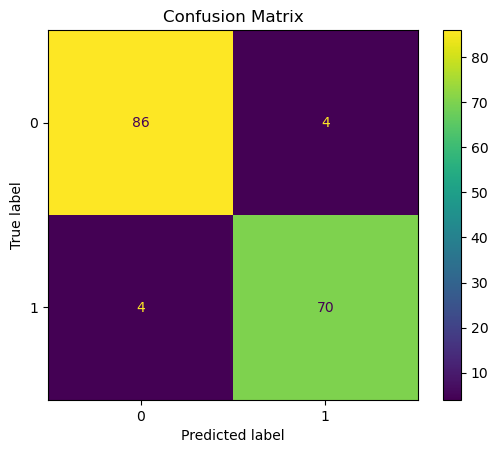

In [49]:

cm = confusion_matrix(y_test, y_pred_log)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Cross validation to ensure that the model can generalize


In [50]:
# Loading and preparing data
x1 = df_cleaned.drop(['fail', 'footfall'], axis=1)
y1 = df_cleaned['fail'].values  # convert to numpy array

# Scaling the data
mms = MinMaxScaler((0, 1))
x_scaled1 = pd.DataFrame(mms.fit_transform(x1), columns=x1.columns)

# Perform PCA
pca = PCA(n_components=7)  # Adjust the number of components as needed
x_pca1 = pca.fit_transform(x_scaled1)

# Base model: logistic regression
log_reg = LogisticRegression()

# Perform cross-validation (K-fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Use cross_val_score to get the cross-validation scores
cv_scores = cross_val_score(log_reg, x_pca1, y1, cv=kf, scoring='accuracy')   

print(f'Accuracy por fold: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation of Accuracy: {cv_scores.std()}')

# Optional: If you want the details of each fold (more information than just the score)
for train_idx, val_idx in kf.split(x_pca1, y1):
    x_train1, x_val1 = x_pca1[train_idx], x_pca1[val_idx]
    y_train1, y_val1 = y1[train_idx], y1[val_idx]  # numpy array, no Series
    
    # Training
    log_reg.fit(x_train1, y_train1)
    y_pred1 = log_reg.predict(x_val1)
    

    print("Classification Report for Fold")
    print(classification_report(y_val1, y_pred1))


Accuracy por fold: [0.93902439 0.90243902 0.91411043 0.90797546 0.93251534]
Mean Accuracy: 0.9192129283256023
Standard Deviation of Accuracy: 0.014164237718877969
Classification Report for Fold
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        90
           1       0.96      0.91      0.93        74

    accuracy                           0.94       164
   macro avg       0.94      0.94      0.94       164
weighted avg       0.94      0.94      0.94       164

Classification Report for Fold
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        90
           1       0.88      0.91      0.89        74

    accuracy                           0.90       164
   macro avg       0.90      0.90      0.90       164
weighted avg       0.90      0.90      0.90       164

Classification Report for Fold
              precision    recall  f1-score   support

           0       0.93      0.91  

# SVM

In [51]:
# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(x_train_pca, y_train)

# Predictions and evaluation
y_pred_svm = svm_model.predict(x_test_pca)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
#print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9451219512195121


# Random Forest

In [52]:

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_pca, y_train)

y_pred_rf=rf_model.predict(x_test_pca)
print('Random Forest Accuracy:', accuracy_score(y_test,y_pred_rf))
#print(classification_report(y_test,y_pred_rf)) 



Random Forest Accuracy: 0.926829268292683


# Multi-Layer Perceptron (MLP)

In [53]:

# MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(x_train_pca, y_train)

y_pred_mlp = mlp_model.predict(x_test_pca)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.9512195121951219
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.95      0.95      0.95        74

    accuracy                           0.95       164
   macro avg       0.95      0.95      0.95       164
weighted avg       0.95      0.95      0.95       164



# Deep Neural Network (DNN)

In [54]:

# Converting data to tensors
X_train_tensor = torch.tensor(x_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy().reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(x_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy().reshape(-1, 1), dtype=torch.float32)

# Definition of DNN model
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),  
            nn.ReLU(),
            nn.Linear(128, 64),        
            nn.ReLU(),
            nn.Linear(64, 32),          
            nn.ReLU(),
            nn.Linear(32, 1),           
            nn.Sigmoid()                
        )

    def forward(self, x):
        return self.layers(x)

In [55]:
# Model initialization
input_size = X_train_tensor.shape[1]  
model = DNN(input_size)

# Definition of the loss function and the optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary problems
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 100
for epoch in range(epochs):
    model.train()   
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:  # Print the loss every 10 epochs
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Model evaluation
model.eval()  
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred_labels = (y_pred_probs >= 0.5).int()


accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy: %.2f" % accuracy)


Epoch [10/100], Loss: 0.6587
Epoch [20/100], Loss: 0.5973
Epoch [30/100], Loss: 0.4981
Epoch [40/100], Loss: 0.3851
Epoch [50/100], Loss: 0.2897
Epoch [60/100], Loss: 0.2375
Epoch [70/100], Loss: 0.2183
Epoch [80/100], Loss: 0.2090
Epoch [90/100], Loss: 0.2033
Epoch [100/100], Loss: 0.1993
Accuracy: 0.96


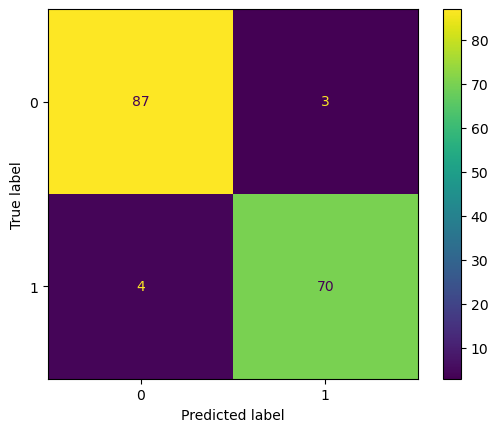

ROC-AUC Score: 0.96


In [56]:
cm = confusion_matrix(y_test, y_pred_labels)
ConfusionMatrixDisplay(cm).plot()
plt.show()

auc_score = roc_auc_score(y_test, y_pred_labels)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Implementation

In [57]:

# Save the weights of the trained model
torch.save(model.state_dict(), 'dnn_model.pth')
# To load the model after
model = DNN(input_size)   
model.load_state_dict(torch.load('dnn_model.pth'))
model.eval()  


DNN(
  (layers): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [58]:

scaler = MinMaxScaler((0, 1))
scaler.fit(x_train)  # Use the adjusted values ​​from training
pca = PCA(n_components=7)
pca.fit(x_train_scaled)


def preprocess_data(new_data):
    new_data_scaled = scaler.transform(new_data)
    new_data_pca = pca.transform(new_data_scaled)
    return torch.tensor(new_data_pca, dtype=torch.float32)


In [59]:
def realtime_prediction(model, new_data):
    processed_data = preprocess_data(new_data)
    with torch.no_grad():
        prediction = model(processed_data)
        return (prediction >= 0.5).int().numpy()   


In [60]:
x_test[0:2], y_test[1:2]

(     tempMode  AQ  USS  CS  VOC  RP  IP  Temperature
 158         0   6    4   7    3  68   6           14
 763         7   4    2   6    4  33   5           24,
 763    1
 Name: fail, dtype: int64)

In [61]:
new_data = np.array([[0,6,4,7,3,68,6,14]])  # Replace with real data
#new_data = np.array(x_test[1:2]) 
predicted_label = realtime_prediction(model, new_data)
print("Prediction:", predicted_label)

Prediction: [[0]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


# Additional experiments

# Trying to predict future failure
## Trying to detect the failure 1 mearurement prior the real failure


In [62]:
df_cleaned.index=range(0,df_cleaned.shape[0])
df_cleaned['future_fail'] = df_cleaned['fail'].shift(-1) 
df_cleaned['future_fail'].fillna(0, inplace=True) 


In [63]:
x=df_cleaned.drop('fail',axis=1).drop('footfall',axis=1).drop('future_fail',axis=1)
y=df_cleaned['future_fail']

In [64]:
print(df_cleaned['future_fail'].value_counts(normalize=True))


future_fail
0.0    0.547124
1.0    0.452876
Name: proportion, dtype: float64


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
mms= MinMaxScaler((0,1))#StandardScaler()

x_train_scaled=pd.DataFrame(mms.fit_transform(x_train),columns=x_train.columns)
x_test_scaled=pd.DataFrame(mms.transform(x_test),columns=x_test.columns)

In [67]:
pca=decomposition.PCA(n_components=7)

x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)
# x_pca=pd.DataFrame(x_pca,columns=['pca1','pca2','pca3','pca4','pca5','pca6'])
x_train_pca, y
x_train_pca_df=pd.DataFrame(x_train_pca)

In [68]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)
y_pred_log=log_reg.predict(x_test_scaled)
print('Accuracy', accuracy_score(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

Accuracy 0.5426829268292683
              precision    recall  f1-score   support

         0.0       0.56      0.77      0.65        90
         1.0       0.49      0.27      0.35        74

    accuracy                           0.54       164
   macro avg       0.52      0.52      0.50       164
weighted avg       0.53      0.54      0.51       164



Accuracy 0.6097560975609756
              precision    recall  f1-score   support

         0.0       0.62      0.74      0.68        90
         1.0       0.59      0.45      0.51        74

    accuracy                           0.61       164
   macro avg       0.60      0.60      0.59       164
weighted avg       0.61      0.61      0.60       164



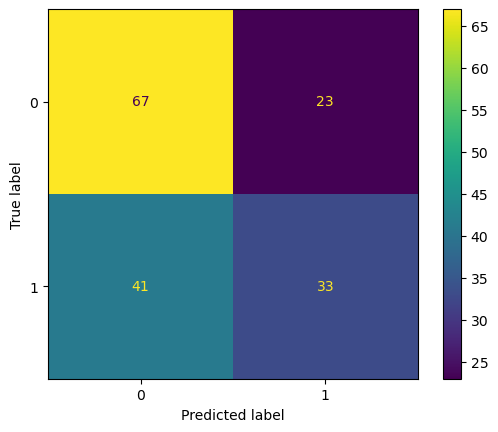

ROC-AUC Score: 0.5951951951951953


In [69]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_pca, y_train)

y_pred_rf=rf_model.predict(x_test_pca)
print('Accuracy', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf)) 


cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.show()

auc_score = roc_auc_score(y_test, y_pred_rf)
print("ROC-AUC Score:", auc_score)


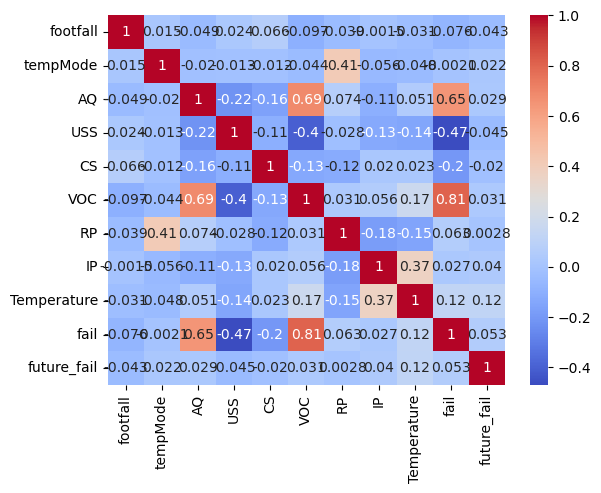

In [70]:

# Correlation between current variables and future failures
df_cleaned['future_fail'] = df_cleaned['fail'].shift(-1)
correlation = df_cleaned.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


future_fail colum has not correlation with the features therefore the model is not able to predict future values

## However, I tried creating an RUL target column by implementing a counter that increments and resets to 0 whenever a failure occurs.

In [71]:
df_cleaned['RUL'] = 0

rul_counter = 0

for i in range(len(df_cleaned)):
    if df_cleaned.loc[i, 'fail'] == 1:  
        rul_counter = 0  
    else:
        rul_counter += 1  
    
    
    df_cleaned.loc[i, 'RUL'] = rul_counter

## I  also created an RUL_percentage column for classification, which is related to the counter that counts the cycles after the failure.

In [72]:

# Create a column for RUL percentage
df_cleaned['RUL_percentage'] = 0

# Variable to carry the starting index of the current interval
start_idx = 0

# Iterate over the DataFrame
for i in range(len(df_cleaned)):
    if df_cleaned.loc[i, 'fail'] == 1:  # If there is a fault
       # Calculate the range for the interval before failure
        interval_length = i - start_idx
        
        # Normalize RUL to 100%-0% range before failure
        if interval_length > 0:  # Avoid divisions by zero
            for j in range(start_idx, i):
                df_cleaned.loc[j, 'RUL_percentage'] = 100 - ((j - start_idx) / interval_length) * 100
        
        # The fault value is 0%
        df_cleaned.loc[i, 'RUL_percentage'] = 0
        
        # Set the start of the next interval
        start_idx = i + 1

# Normalize data after the last failure to the end of the DataFrame
interval_length = len(df_cleaned) - start_idx
if interval_length > 0:
    for j in range(start_idx, len(df_cleaned)):
        df_cleaned.loc[j, 'RUL_percentage'] = 100 - ((j - start_idx) / interval_length) * 100

# Check the results
print(df_cleaned[['RUL', 'RUL_percentage', 'fail']])


     RUL  RUL_percentage  fail
0      1           100.0     0
1      0             0.0     1
2      0             0.0     1
3      1           100.0     0
4      2            50.0     0
..   ...             ...   ...
812    0             0.0     1
813    0             0.0     1
814    0             0.0     1
815    0             0.0     1
816    0             0.0     1

[817 rows x 3 columns]


/tmp/ipykernel_2392/257230536.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '83.33333333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[j, 'RUL_percentage'] = 100 - ((j - start_idx) / interval_length) * 100


In [73]:

# Define the conditions for categorizing
conditions = [
    (df_cleaned['RUL_percentage'] >= 75),  # 75% o más
    (df_cleaned['RUL_percentage'] >= 50) & (df_cleaned['RUL_percentage'] < 75),  # 50% - 75%
    (df_cleaned['RUL_percentage'] >= 25) & (df_cleaned['RUL_percentage'] < 50),  # 25% - 50%
    (df_cleaned['RUL_percentage'] < 25)  # Menor de 25%
]

# Define the corresponding categories
categories = ['75-100%', '50-75%', '25-50%', '0-25%']

# Assign category according to conditions
df_cleaned['RUL_category'] = np.select(conditions, categories, default='Unknown')

# Check the result
print(df_cleaned[['RUL_percentage', 'RUL_category']].head())


   RUL_percentage RUL_category
0           100.0      75-100%
1             0.0        0-25%
2             0.0        0-25%
3           100.0      75-100%
4            50.0       50-75%


In [74]:
# Check for out-of-range values
print(df_cleaned[df_cleaned['RUL_percentage'] < 0])
print(df_cleaned[df_cleaned['RUL_percentage'] > 100])


Empty DataFrame
Columns: [footfall, tempMode, AQ, USS, CS, VOC, RP, IP, Temperature, fail, future_fail, RUL, RUL_percentage, RUL_category]
Index: []
Empty DataFrame
Columns: [footfall, tempMode, AQ, USS, CS, VOC, RP, IP, Temperature, fail, future_fail, RUL, RUL_percentage, RUL_category]
Index: []


In [75]:
df_cleaned.RUL.value_counts()

RUL
0     370
1     192
2     110
3      58
4      35
5      25
6      11
7       7
8       6
9       2
10      1
Name: count, dtype: int64

In [76]:
# Split the data into features (X) and label (y)
X = df_cleaned.drop(columns=['fail', 'RUL', 'future_fail', 'RUL_percentage', 'RUL_category'])  
y = df_cleaned['RUL_category']  

# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [77]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Encode the categories
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [78]:

scaler = StandardScaler()

# Adjusting and transforming training characteristics
X_train_scaled = scaler.fit_transform(X_train)

# Transforming test features
X_test_scaled = scaler.transform(X_test)


# Training

In [79]:

# Initialize the model
classifier = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1
)

# Training
classifier.fit(X_train_scaled, y_train_encoded)


RandomForestClassifier(n_jobs=-1, random_state=42)

# Calculate better parameters for the RandomForestClassifier

In [80]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_encoded)

print("Mejores parámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy después del ajuste: {accuracy:.2f}")


Mejores parámetros: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy después del ajuste: 0.67


Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

       0-25%       0.92      0.85      0.88        40
      25-50%       0.00      0.00      0.00         7
      50-75%       0.40      0.17      0.24        12
     75-100%       0.50      0.87      0.63        23

    accuracy                           0.68        82
   macro avg       0.45      0.47      0.44        82
weighted avg       0.65      0.68      0.64        82


Confusion Matrix:
[[34  0  1  5]
 [ 1  0  0  6]
 [ 1  0  2  9]
 [ 1  0  2 20]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


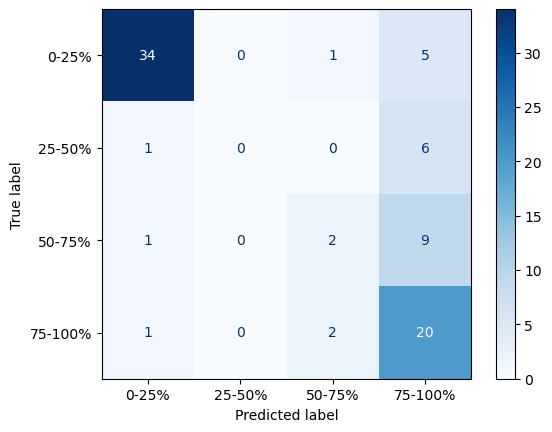

In [81]:

y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test_encoded, y_pred)
print("\nConfusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')  
plt.show()


In [82]:

# Change models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = XGBClassifier(n_estimators=100, random_state=42)
model3 = SVC(kernel='linear', random_state=42)

ensemble_model = VotingClassifier(estimators=[('rf', model1), ('xgb', model2), ('svm', model3)], voting='hard')
ensemble_model.fit(X_train_scaled, y_train_encoded)

# Predictions
y_pred = ensemble_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy del modelo en conjunto: {accuracy:.2f}")



Accuracy del modelo en conjunto: 0.68


In [83]:
df_cleaned['RUL'] = 0

rul_counter = 0

for i in range(len(df_cleaned)):
    if df_cleaned.loc[i, 'fail'] == 1: 
        rul_counter = 0  
    else:
        rul_counter += 1  
    
    df_cleaned.loc[i, 'RUL'] = rul_counter


In [84]:
print(df_cleaned[['fail', 'RUL','RUL_percentage']].head(20))
#df_cleaned.head(25)

    fail  RUL  RUL_percentage
0      0    1      100.000000
1      1    0        0.000000
2      1    0        0.000000
3      0    1      100.000000
4      0    2       50.000000
5      1    0        0.000000
6      1    0        0.000000
7      0    1      100.000000
8      1    0        0.000000
9      0    1      100.000000
10     0    2       83.333333
11     0    3       66.666667
12     0    4       50.000000
13     0    5       33.333333
14     0    6       16.666667
15     1    0        0.000000
16     1    0        0.000000
17     1    0        0.000000
18     0    1      100.000000
19     0    2       50.000000


In [85]:
counts = df_cleaned['RUL_percentage'].value_counts()
valid_rul = counts[counts > 1].index
df_cleaned_filtered = df_cleaned[df_cleaned['RUL_percentage'].isin(valid_rul)]


In [86]:
X = df_cleaned_filtered.drop(columns=['fail', 'RUL','future_fail','RUL_percentage','RUL_category'])#,'cycle_id'])  # Sensores como entrada
y = df_cleaned_filtered['RUL_percentage']  # RUL como objetivo
# X = df_cleaned_filtered.drop(columns=['fail', 'RUL','future_fail'])#,'cycle_id'])  # Sensores como entrada
# y = df_cleaned_filtered['RUL']  # RUL como objetivo


In [87]:
y.value_counts()

RUL_percentage
0.000000      370
100.000000    192
50.000000      71
66.666667      28
33.333333      28
40.000000      15
60.000000      15
80.000000      15
20.000000      15
25.000000      14
75.000000      14
62.500000       4
37.500000       4
12.500000       4
87.500000       4
16.666667       4
83.333333       4
Name: count, dtype: int64

In [88]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [89]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   
X_test_scaled = scaler.transform(X_test)   



In [90]:
rul_scaler = MinMaxScaler()
y_train_scaled = rul_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = rul_scaler.transform(y_test.values.reshape(-1, 1))

y_pred_original = rul_scaler.inverse_transform(y_pred.reshape(-1, 1))


In [91]:

model = RandomForestRegressor(
    n_estimators=300, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    max_depth=10, 
    random_state=42
)
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [92]:
y_test_original = rul_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_pred_original = rul_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
r2 = r2_score(y_test_original, y_pred_original)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 20.21
RMSE: 28.61
R²: 0.53


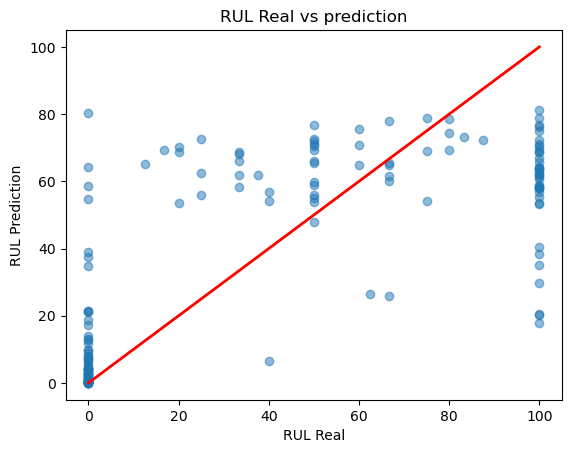

In [93]:
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], color='red', linewidth=2)
plt.xlabel("RUL Real")
plt.ylabel("RUL Prediction")
plt.title("RUL Real vs prediction")
plt.show()


Epoch 1/100, Loss: 0.8678
Epoch 2/100, Loss: 0.4084
Epoch 3/100, Loss: 0.2029
Epoch 4/100, Loss: 0.1629
Epoch 5/100, Loss: 0.1603
Epoch 6/100, Loss: 0.1291
Epoch 7/100, Loss: 0.1176
Epoch 8/100, Loss: 0.1033
Epoch 9/100, Loss: 0.0933
Epoch 10/100, Loss: 0.0860
Epoch 11/100, Loss: 0.0824
Epoch 12/100, Loss: 0.0807
Epoch 13/100, Loss: 0.0802
Epoch 14/100, Loss: 0.0759
Epoch 15/100, Loss: 0.0761
Epoch 16/100, Loss: 0.0727
Epoch 17/100, Loss: 0.0757
Epoch 18/100, Loss: 0.0743
Epoch 19/100, Loss: 0.0723
Epoch 20/100, Loss: 0.0731
Epoch 21/100, Loss: 0.0729
Epoch 22/100, Loss: 0.0700
Epoch 23/100, Loss: 0.0699
Epoch 24/100, Loss: 0.0701
Epoch 25/100, Loss: 0.0714
Epoch 26/100, Loss: 0.0680
Epoch 27/100, Loss: 0.0688
Epoch 28/100, Loss: 0.0664
Epoch 29/100, Loss: 0.0665
Epoch 30/100, Loss: 0.0694
Epoch 31/100, Loss: 0.0684
Epoch 32/100, Loss: 0.0671
Epoch 33/100, Loss: 0.0657
Epoch 34/100, Loss: 0.0661
Epoch 35/100, Loss: 0.0664
Epoch 36/100, Loss: 0.0632
Epoch 37/100, Loss: 0.0663
Epoch 38/1

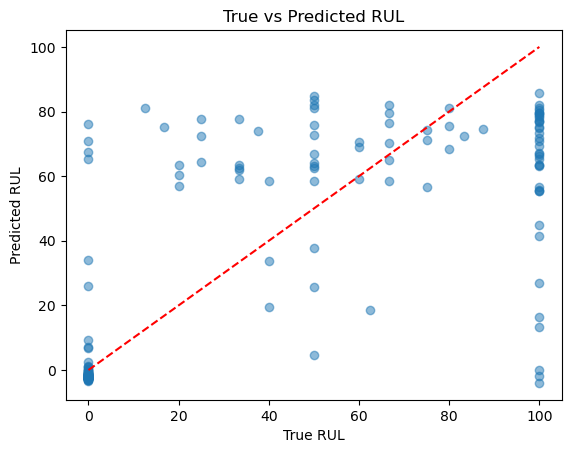

In [94]:

class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1)  
        )

    def forward(self, x):
        return self.model(x)

input_size = X_train.shape[1]
model = DNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

from torch.utils.data import DataLoader, TensorDataset


X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

train_loader = DataLoader(train_dataset, batch_size=128)#, shuffle=True)

# training
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

    
    predictions_scaled = model(X_test_tensor).detach().numpy()

    
    predictions_original = rul_scaler.inverse_transform(predictions_scaled)
    y_test_original = rul_scaler.inverse_transform(y_test_scaled)

    mae = mean_absolute_error(y_test_original, predictions_original)
    rmse = mean_squared_error(y_test_original, predictions_original, squared=False)
    r2 = r2_score(y_test_original, predictions_original)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

    import matplotlib.pyplot as plt
    plt.scatter(y_test_original, predictions_original, alpha=0.5)
    plt.plot([y_test_original.min(), y_test_original.max()],
             [y_test_original.min(), y_test_original.max()],
             color='red', linestyle='--')
    plt.xlabel("True RUL")
    plt.ylabel("Predicted RUL")
    plt.title("True vs Predicted RUL")
    plt.show()
